In [910]:
import pandas as pd
import numpy as np

### Data Reading and Cleaning

In [911]:
#Reading the data
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [912]:
df.info()
#we can see that there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [913]:
#checking for any spelling errors in country column by checking unique values of column
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [914]:
df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [915]:
#Converting exports,health,imports to original valuses which are now in percetage
df['exports_per_capita']=df['exports']*df['gdpp']/100
df['health_per_capita']=df['health']*df['gdpp']/100
df['imports_per_capita']=df['imports']*df['gdpp']/100

In [916]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,health_per_capita,imports_per_capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


In [917]:
#creating copy of dataset
df_copy=df.copy()

### Data Preperation

In [918]:
from sklearn.preprocessing import StandardScaler

In [919]:
#droping repeated and unnecessary columns 
df.drop(['country','imports','health','exports'],axis=1,inplace=True)

In [920]:
#scaling the dataset using Standard Scaler because pca assumes data to be centralised i.e. mean=0
scaler=StandardScaler()
cols=df.columns
df[cols]=scaler.fit_transform(df)
df.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,health_per_capita,imports_per_capita
0,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.411011,-0.565040,-0.432276
1,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.350191,-0.439218,-0.313677
2,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.318526,-0.484826,-0.353720
3,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.291375,-0.532363,-0.345953
4,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.104331,-0.178771,0.040735


In [921]:
df.describe()
#all the variables are standardised with mean=0 and std=1

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,health_per_capita,imports_per_capita
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17,9.174298e-17,-2.260334e-17,3.589943e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01,-4.140371e-01,-5.812404e-01,-4.491604e-01
25%,-7.466190e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01,-3.891452e-01,-5.446513e-01,-4.055539e-01
50%,-4.717981e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01,-3.149097e-01,-4.091560e-01,-3.097338e-01
75%,5.926666e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02,-7.958645e-03,-4.442811e-02,7.713036e-02
max,4.221297e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00,9.839814e+00,4.235432e+00,9.716681e+00


### Performing PCA 

In [922]:
from sklearn.decomposition import PCA

In [923]:
#applying PCA
pca=PCA(svd_solver='randomized',random_state=42)

In [924]:
#training the model
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [925]:
#components of PCA nothing but eigeon vectors
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8
0,-0.316392,0.380041,-0.143085,0.343857,-0.302842,0.399988,0.342887,0.358535,0.344865
1,0.476267,0.128384,0.221261,-0.369820,0.459715,0.200624,0.397311,0.155053,0.370781
2,-0.150012,0.145764,0.948419,0.196752,-0.077834,0.010339,-0.030574,-0.075703,-0.072174
3,-0.148052,-0.154806,-0.007628,-0.018395,-0.213928,-0.364772,0.449425,-0.599712,0.461798
4,0.101995,0.794075,-0.136423,-0.154041,-0.020336,0.087501,-0.038538,-0.493200,-0.252787
5,0.196585,-0.038147,0.108403,-0.586010,-0.753901,0.045382,-0.038911,0.180699,-0.012180
6,0.761267,-0.023113,-0.022077,0.581208,-0.273145,-0.044023,-0.013670,-0.064616,0.027182
7,0.006444,0.393811,-0.006070,0.002966,0.034293,-0.799022,-0.055264,0.430072,0.131135
8,-0.004951,0.079011,0.011281,-0.031594,0.023682,0.128464,-0.717924,-0.130346,0.665687


In [926]:
import matplotlib.pyplot as plt

Text(0,0.5,'cumulative variance explained')

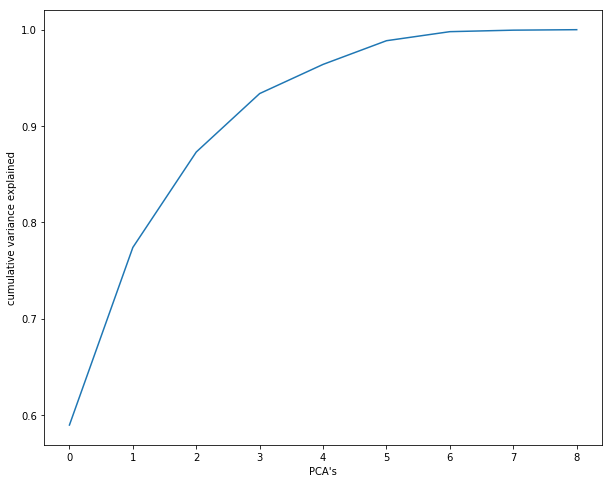

In [927]:
#scree plot 
plt.figure(figsize=[10,8])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("PCA's")
plt.ylabel("cumulative variance explained")

- by observing above Scree plot if we choose 5 as number of components we get around 0.96 variance which is preety good and after that it does increase much 

In [928]:
#Original features vs PCA's
cols=df.columns
pca_df=pd.DataFrame({'Original_Features':cols,'pc1':pca.components_[0],'pc2':pca.components_[1],'pc3':pca.components_[2],'pc4':pca.components_[3],'pc5':pca.components_[4]})
pca_df

,Original_Features,pc1,pc2,pc3,pc4,pc5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,income,0.380041,0.128384,0.145764,-0.154806,0.794075
2,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
3,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
4,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
5,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501
6,exports_per_capita,0.342887,0.397311,-0.030574,0.449425,-0.038538
7,health_per_capita,0.358535,0.155053,-0.075703,-0.599712,-0.493200
8,imports_per_capita,0.344865,0.370781,-0.072174,0.461798,-0.252787


In [929]:
import seaborn as sns

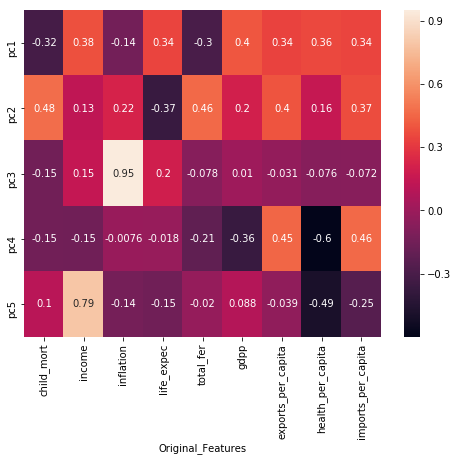

In [930]:
# Analysing the above in heat map
plt.figure(figsize=[8,6])
sns.heatmap(pca_df.set_index('Original_Features').T,annot=True)

- Observations from heatmap
  - theme1(pc1) explains all features except inflation
  - theme2(pc2) explains child_mort,life_expect,total_fer,exports_percapita,imports_percapita
  - theme3(pc3) expalins inflation
  - theme4(pc4) explains gdpp,exports_percapita,imports_percapita,health_percapita
  - theme5(pc5) explains income and health

In [931]:
from sklearn.decomposition import IncrementalPCA

In [932]:
#using incrementalPCA to get 5 pca's
pca_df_final=IncrementalPCA(n_components=5).fit_transform(df)
pca_df_final=pd.DataFrame(pca_df_final,columns=['pc1','pc2','pc3','pc4','pc5'])

In [933]:
pca_df_final.head()

,pc1,pc2,pc3,pc4,pc5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


In [934]:
pca_df_final.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,pc1,pc2,pc3,pc4,pc5
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,7.977650e-18,6.648042e-18,-9.141058e-18,-4.387708e-17,9.888963e-18
std,2.310043e+00,1.292227e+00,9.472998e-01,7.405031e-01,5.246024e-01
min,-3.939540e+00,-1.700102e+00,-1.747502e+00,-4.397469e+00,-1.816076e+00
25%,-1.447672e+00,-9.804050e-01,-4.010265e-01,-3.288881e-01,-1.671520e-01
50%,-3.575034e-01,-3.972925e-01,-1.730204e-01,-1.379197e-01,-5.690151e-02
75%,8.501392e-01,6.784352e-01,2.547401e-01,2.117017e-01,9.129827e-02
90%,2.977550e+00,1.589363e+00,9.272553e-01,7.370597e-01,2.287218e-01
95%,3.918047e+00,2.174060e+00,1.174755e+00,1.185077e+00,5.360638e-01
99%,6.374141e+00,3.310778e+00,3.094791e+00,2.065314e+00,2.249720e+00


- As we can see greater than 99 percentiles could be possible outliers 

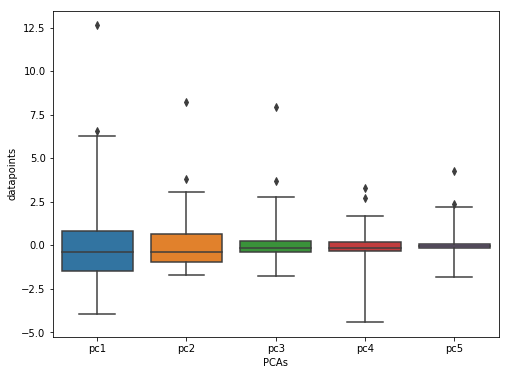

In [935]:
#visualising outliers
plt.figure(figsize=[8,6])
temp=pca_df_final.melt(var_name='PCAs',value_name='datapoints') #preparing the data to plot box plot all PCA's at once
sns.boxplot(x='PCAs',y='datapoints',data=temp,whis=[0,99])

- We are not sure whether they are outliers or not so continuing without removing anything

In [936]:
#creating copy of dataframe
pca_df_final_copy=pca_df_final.copy()

### Clustering

In [937]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [938]:
hopkins(pca_df_final)
#since the value is >0.5 so there is high tendency to form cluster

0.9428017706153066

In [939]:
#1st trying hierarchical clustering to get an idea of how much k we can select and later we can try k-means using the k we got from heirachical clusttering 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram

In [940]:
# performing heirarchial clustering
mergings=linkage(pca_df_final,method='complete')

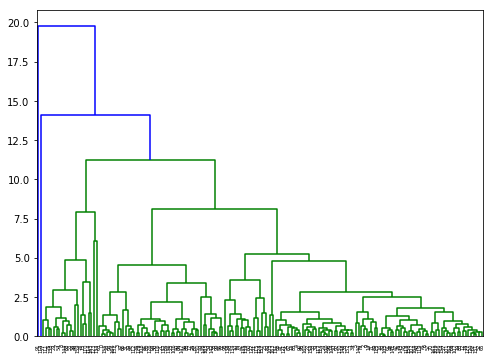

In [941]:
plt.figure(figsize=[8,6])
dendrogram(mergings)
plt.show()

- Observations from above dendogram 
     - if choose 4 clusters the distance between clusters is significant and also we will good number of clusters
     - and also we need to check for good number of population within each clusters because if only few countries stay wthin cluster then it becomes difficult for CEO to take seperate decision for only those few countries
     - if we choose 6 clusters some clusters will be having very less populated so going with 4

In [942]:
#getting the cluster labels by choosing number of clusters
cluster_labels=cut_tree(mergings,n_clusters=4)


In [943]:
#merging country column to pca dataframe
pca_df_final['country']=df_copy['country'] 
pca_df_final.head()

,pc1,pc2,pc3,pc4,pc5,country
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda


In [944]:
#merging clusters column to pca dataframe
pca_df_final['clusters']=cluster_labels
pca_df_final.head()

,pc1,pc2,pc3,pc4,pc5,country,clusters
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,Afghanistan,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Albania,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Algeria,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,Angola,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Antigua and Barbuda,0


In [945]:
#observing the population of clusters
pca_df_final['clusters'].value_counts()

0    144
1     21
3      1
2      1
Name: clusters, dtype: int64

- we can see that cluster 2 and 3 contains very less population so we can ignore those and analyse them seperately

In [946]:
#printing countries from cluster 2 and 3
pca_df_final[pca_df_final['clusters']>1]

,pc1,pc2,pc3,pc4,pc5,country,clusters
91,12.634875,8.223170,-0.619224,-4.397469,-1.816076,Luxembourg,2
113,-3.934562,3.819889,7.928612,0.552150,-1.076631,Nigeria,3


In [947]:
#deleting cluster 2 and 3 since it contains very less population seperate action can be taken for these countries
pca_df_final=pca_df_final[pca_df_final['clusters']<2]

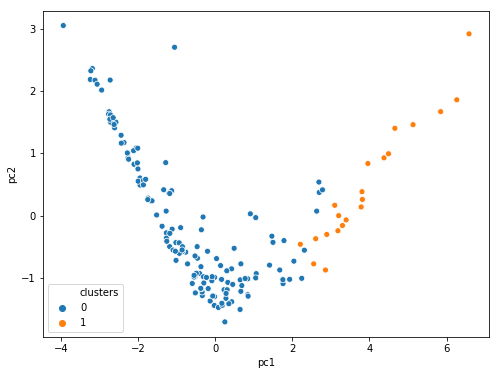

In [948]:
#plotting data points in pc1,pc2 plane since these 2 caputres maximum variance
plt.figure(figsize=[8,6])
sns.scatterplot(x='pc1',y='pc2',data=pca_df_final,hue='clusters')


### K-means clustering

In [949]:
#creating copy of data frame
pca_df_final=pca_df_final_copy.copy()

In [950]:
from sklearn.cluster import KMeans

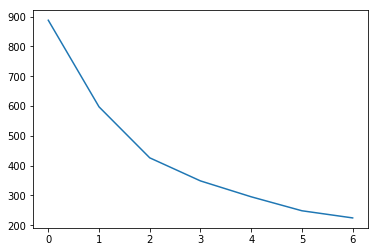

In [951]:
#elbow curve
ssd=[]
range_clusters=[2,3,4,5,6,7,8]
for clust in range_clusters:
    kmeans=KMeans(n_clusters=clust,max_iter=50,random_state=50)
    kmeans.fit(pca_df_final)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

- As we can see from the above plot there is no significant dip from 2 to 3 cluster or we can see elbow like structure at cluster 2 but we can't decide yet the value of K

In [952]:
#silhoute analysis
from sklearn.metrics import silhouette_score


range_clusters=[2,3,4,5,6,7,8]
for clust in range_clusters:
    kmeans=KMeans(n_clusters=clust,max_iter=50,random_state=50)
    kmeans.fit(pca_df_final)
    cluster_labels=kmeans.labels_
    score=silhouette_score(pca_df_final,cluster_labels)
   
    print("for n_cluster={0} silhoute_soure={1}".format(clust,score))


for n_cluster=2 silhoute_soure=0.48066046782755917
for n_cluster=3 silhoute_soure=0.45415128979715086
for n_cluster=4 silhoute_soure=0.4619522027493683
for n_cluster=5 silhoute_soure=0.46500328500357124
for n_cluster=6 silhoute_soure=0.37681320556246345
for n_cluster=7 silhoute_soure=0.3592133785888146
for n_cluster=8 silhoute_soure=0.3298372473613854


- Observing the above silhoute scores cluster 2 has maximum but from bussiness point of view it doesnot make much sense of those clusters so next highest is cluster 4 and also form heirachial clustering cluster 4 made sense so choosing K=4

In [953]:
#final model with k=4
kmeans=KMeans(n_clusters=4,max_iter=200,random_state=50)
kmeans.fit(pca_df_final)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [954]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 3, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [955]:
#copying labels in to dataframe
pca_df_final['Clusters']=kmeans.labels_

In [956]:
#observing population of clusters
pca_df_final['Clusters'].value_counts()

0    87
2    48
1    30
3     2
Name: Clusters, dtype: int64

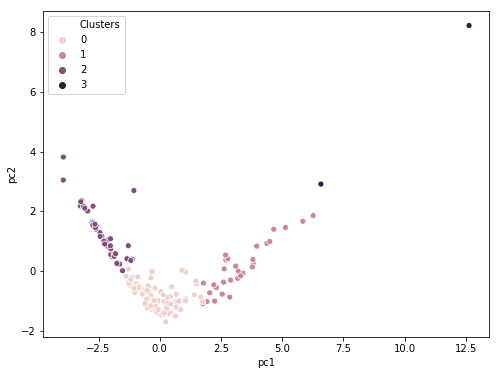

In [957]:
#plotting data points in pc1,pc2 plane since these 2 caputres maximum variance
plt.figure(figsize=[8,6])
sns.scatterplot(x='pc1',y='pc2',data=pca_df_final,hue='Clusters')

- we can choose kmeans clustering for proceding with analysis since it gives clusters with good population except 3 cluster which contains only 2 countries  and also clusters seems intutive from the above plot which seems better than heirarchial clustering

### Analysing clusters on original data set

In [958]:
#creating copy of dataframe
df_original=df_copy.copy()

In [959]:
#droping unncessary columns form original data set
df_original.drop(['imports','health','exports'],axis=1,inplace=True)
df_original.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,health_per_capita,imports_per_capita
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


In [960]:
# merrging cluster labels to original data set
df_original['clusters']=kmeans.labels_

In [961]:
#information of dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
country               167 non-null object
child_mort            167 non-null float64
income                167 non-null int64
inflation             167 non-null float64
life_expec            167 non-null float64
total_fer             167 non-null float64
gdpp                  167 non-null int64
exports_per_capita    167 non-null float64
health_per_capita     167 non-null float64
imports_per_capita    167 non-null float64
clusters              167 non-null int32
dtypes: float64(7), int32(1), int64(2), object(1)
memory usage: 13.8+ KB


In [962]:
#converting clustering column in to object
df_original['clusters']=df_original['clusters'].astype(str)

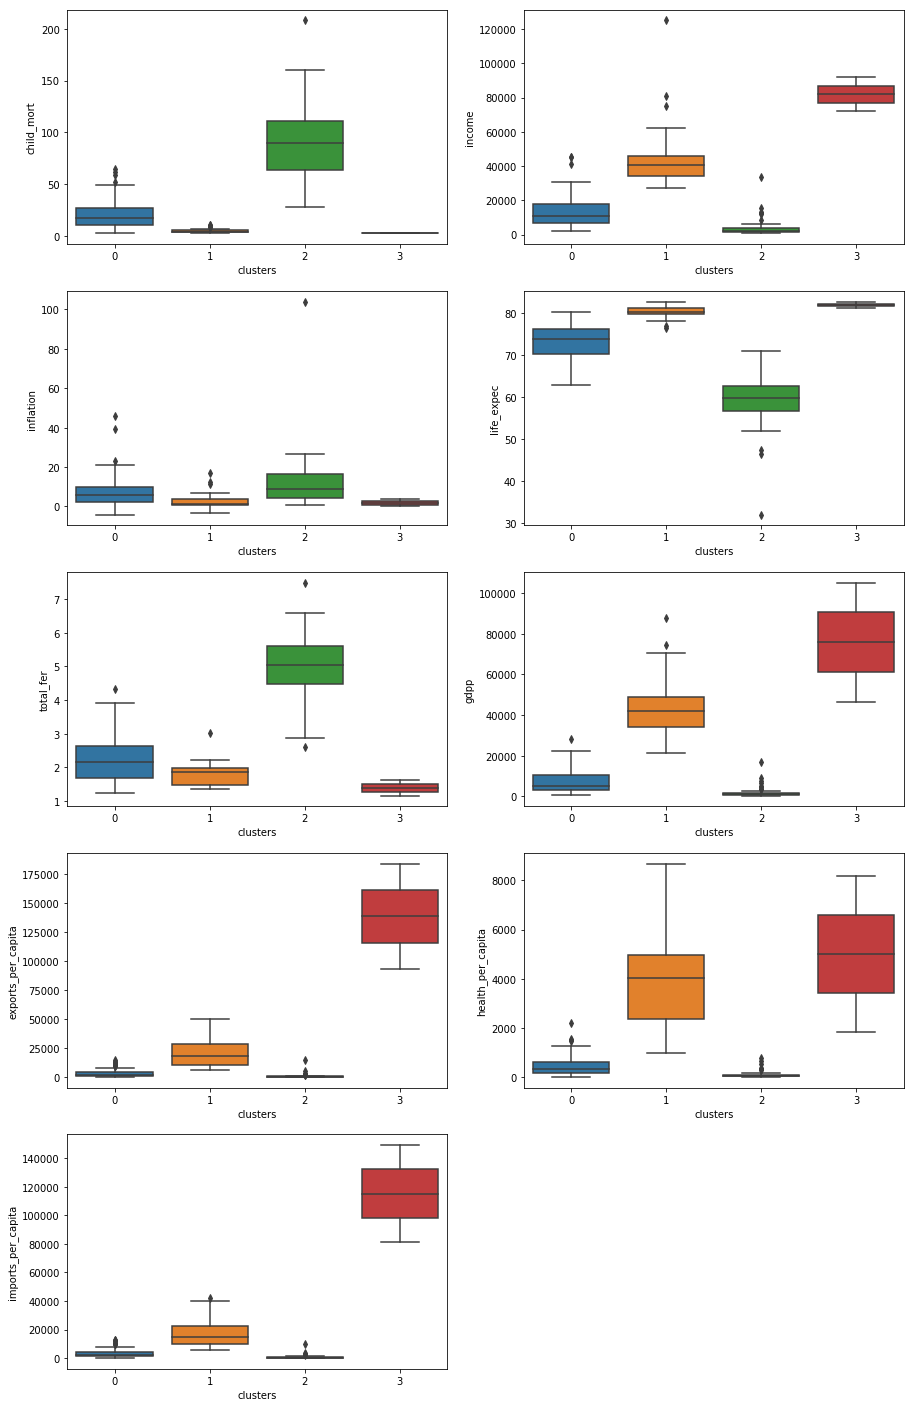

In [963]:
#Analysing clusters with original features
plt.figure(figsize=[15,25])
columns=list(df_original.columns)
columns=list(df_original.columns)
columns.remove('country')
columns.remove('clusters')
for cols,i in zip(columns,range(1,10)):
    plt.subplot(5,2,i)
    sns.boxplot(y=cols,x='clusters',data=df_original)

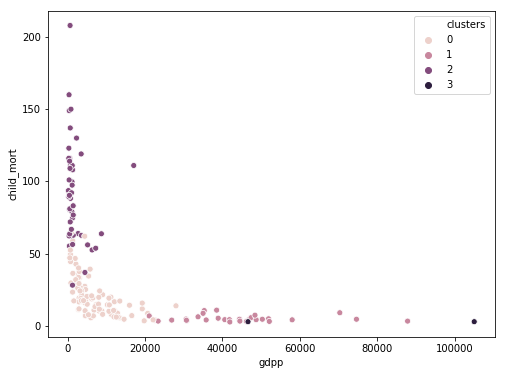

In [964]:
df_original['clusters']=df_original['clusters'].astype('int64')
plt.figure(figsize=[8,6])
sns.scatterplot(x='gdpp',y='child_mort',hue='clusters',data=df_original)

- Observations from the above plots
    - Cluster 3 does not have much population so we can merge with cluster 1 since their behaviour with features is almost same
    - cluster 1 and 3 are developed countries because they have high gdpp,high income and low child_mort
    - cluster 0 is developing because they have average gdpp,average income and average child_mort
    - cluster 2 is under developed because they have low gdpp,low income and high child_mort

In [965]:
#choosing cluster 1 and 3
df_original.loc[(df_original['clusters']==3) | (df_original['clusters']==1),'country']

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
135                Slovenia
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

- The above countries are developed belonging to cluster 3 and 1

In [966]:
#choosing cluster 0
pd.set_option('display.max_rows',200)
df_original.loc[(df_original['clusters']==0),'country']

1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
10                            Bahamas
11                            Bahrain
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
22                             Brazil
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
39                         Costa Rica
41                            Croatia
43                     Czech Republic
45                 Dominican Republic
46          

- The above displayed countries are developing belonging to cluster 0

In [967]:
#choosing cluster 2
df_original.loc[(df_original['clusters']==2),'country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

- The above displayed countries are under developed belonging to cluster 2

In [968]:
#getting the means of clusters for each columns
df_original.groupby(by='clusters').mean()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,health_per_capita,imports_per_capita
clusters,,,,,,,,,
0,21.113793,13297.586207,7.371506,73.147126,2.251954,7158.298851,3328.149408,460.000120,3404.497944
1,5.043333,45180.000000,2.764533,80.383333,1.799667,43300.000000,21018.310000,4031.304333,17806.070000
2,91.610417,3897.354167,11.911146,59.239583,4.992083,1909.208333,879.063521,114.821765,827.028771
3,2.800000,81900.000000,1.787000,82.000000,1.390000,75800.000000,138475.000000,5001.930000,115092.000000


- we are deciding the country developed or developing or under developed based on these features child_mort,income,gdpp,inflation. Therefore using binning concept on these features
- we came to know that countries having high child_mort,low income, low gdpp,high inflation falls in the category of under developed countries after observing above plots

In [969]:
#using binning to get countries which are performing bad in under developed cluster
df_final=df_original.loc[(df_original['child_mort']>=91.61) & (df_original['income']<=3897.35) & (df_original['gdpp']<=1909.2) & (df_original['inflation']>=11.9) ]
df_final

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,health_per_capita,imports_per_capita,clusters
26,Burundi,93.6,764,12.3,57.7,6.26,231,20.6052,26.7960,90.552,2
37,"Congo, Dem. Rep.",116.0,609,20.8,57.5,6.54,334,137.2740,26.4194,165.664,2
63,Guinea,109.0,1190,16.1,58.0,5.34,648,196.3440,31.9464,279.936,2
99,Mauritania,97.4,3320,18.9,68.2,4.98,1200,608.4000,52.9200,734.400,2
132,Sierra Leone,160.0,1220,17.2,55.0,5.20,399,67.0320,52.2690,137.655,2


## The countries which are in dier need of help are
1. Burund 
2. Congo,Dem. Rep
3. Guinea,
4. Mauritania
5. Sierra Leone

**These countries have high child_mort, low net income per person,low gdpp and high inflation**